# Problem statement
For this project you must create a data set by simulating a real-world phenomenon of
your choosing. You may pick any phenomenon you wish – you might pick one that is
of interest to you in your personal or professional life. Then, rather than collect data
related to the phenomenon, you should model and synthesise such data using Python.
We suggest you use the numpy.random package for this purpose.
Specifically, in this project you should:

* Choose a real-world phenomenon that can be measured and for which you could
collect at least one-hundred data points across at least four different variables.
* Investigate the types of variables involved, their likely distributions, and their
relationships with each other.
* Synthesise/simulate a data set as closely matching their properties as possible.
* Detail your research and implement the simulation in a Jupyter notebook – the
data set itself can simply be displayed in an output cell within the notebook.

Note that this project is about simulation – you must synthesise a data set. Some
students may already have some real-world data sets in their own files. It is okay to
base your synthesised data set on these should you wish (please reference it if you do),
but the main task in this project is to create a synthesised data set. The next section
gives an example project idea.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Layout:

* Introduce the dataset I'll be looking at.
* Introduce information on International Students in China. 
* Include algorithms for selecting student country, program type and scholarship with research to support.
* Introduce the HSK, and the difference between the levels.
* Algorithms and calculations for HSK tests with research to support.
* Algorithms and calculations for HSKK tests with research to support.
* Bringing it all together.
* Visualizations.

# Introduction

This is Brian Doheny's submission for the Programming for Data Analysis 2020 module at Galway-Mayo Institute of Technology. For this project, I will be simulating the student records for a Chinese language school in China in 2018. Every student will have the following data points simulated:
* Student nationality
* Student funding (Scholarship or Self-Funded)
* The type of program the student is enrolled in (Non-degree, Undergraduate, Master's, or Doctoral)
* Whether or not the student attempted the written HSK test.
* Whether or not the student attempted the oral HSKK test.

For those students that did elect to take either a written or oral test, I will then simulate additional data points for them, namely:
* Level of HSK test attempted
* Reading score
* Listening score
* Writing score (HSK 3-6 only)
* Total score
* Pass/Fail result
* Level of HSKK test attempted
* Speaking score
* Pass/Fail result

I will begin my introduction the phenomenoms involved in this dataset, alongside a note on my sources of information. I will then be going through the introduction to and simulation of each of the above listed data points. Here you will find my references to my resources, calculations and examples of the simulations for the individual data points, and the final code for that specific that points that will be included into the final algorithm. Next I will bring all the code snippets together into one working algorithm contained in a single Jupyter Notebook cell, and I will then include some visualizations of the data set highlighting the relationships in the data. Finally you will find a complete list of the resources used in this project.

## Phenomenoms in this scenario

The main phenomenom I will show in this data set is with regards to how few students attempt one of the HSK tests, yet the HSK tests have a fairly high pass rate. I will also be showing that the HSK test is far more popular than the HSKK test, and that as the HSK test increases in levels, more and more students attempt the test. This peaks at HSK level 5, and then decreases for HSK level 6.

Alongside this I will also be showing that the largest share of students are this fictional school originate from South Korea, and South Korean students will also be among the largest sources of HSK test takers.


## Sources of information

As I go through each section of the simulates data set, I will be referencing my sources of information in more depth. In general though, my sources are a mixture of official research carried out by Hanban (the organization that administers the HSK test), government statistics on international students in China, and third party research papers.

I have selected 2018 as the year to base my data set on. As 2018 was the year in which neither academic year (2017/18 and 2018/19) was disrupted, it therefore makes for a strong candidate. 2020 saw many disruptions for governments and institutions, and so data and reports regarding international students in China in 2019 lack the detail or simply have not yet been published.

That said, many of my sources actually predate 2018, especially with regards to the HSK tests. Finding papers and data on the HSK test has proved to be very difficult, despite searching in English and Simplified Chinese. Therefore some of my sources data from 2012, and so I have extrapolated the relationships and data points out to the 2018 student numbers. This is not a perfect simulation of the student data, however it will allow us to see the effects if the tends up to 2012 had continued through to 2018, and should not be wildly off track. 

### Determining the size of the school

As this data set is randomly generated, we can determine how large we wish the school to be. As will be highlighted later, some of the data points have results that only appear 1% of the time, and so for this reason I have been setting the below school_size variable to 500. You can edit this to any number you wish, and it will be used throughout the simulations in this Jupyter Notebook.

In [2]:
#Can alter this to change the school size.
school_size = 500

## Student Country of Origin

### International Students in China
The total number of International Students studying in China has mirrored the enconomic growth of China, and thus grown rapidly over the last two decades, going from 52,150 students in 2000[1] to 492,185 in 2018[2]. Throughout this radid growth, South Korea[1][2] has been the single largest source of International Students in China, largely due to the geographic proximity and the strong trade flows between the two countries. 

Japan, the USA and Russia have also been large sources of International Students over the years, however more recently we are seeing developing countries in Asia becoming larger and larger sources. For example, India and Pakistan didn't even rank among the 10 largest sources of International Students until 2006 (5634 and 3308 students respectively)[1] yet by 2018 these two countries were the third and 4th largest sources, both with over 28,000 students enrolled in study programs in Mainland China[2]. This growth in students from developing countries potentially reflects the stronger economic and political ties between the countries, as well as the the economic growth of the source country itself.

It was not possible to find a complete country by country breakdown of student nationalities in 2018, however the Ministry of Education have released the top 15 nationalities[2]:
* South Korea 50,600
* Thailand 28,608
* Pakistan 28,023
* India 23,198
* United States 20,996
* Russia 19,239
* Indonesia 15,050
* Laos 14,645
* Japan 14,230
* Kazakhstan 11,784
* Vietnam 11,299
* Bangladesh 10,735
* France 10,695
* Mongolia 10,158
* Malaysia 9,479

This accounts for 278,739 of the 492,185 International Students in China in 2018, and so we're lacking detail on the remaining 213,446 students. 

Through further research, I was able to find that there were 81,562 students from African countries in China in 2018.

I've since found that there were 81,562 African students in China in 2018[3]. While I do not have a country by country breakdown for these students, I can at least narrow down these 81,562 students to the 54 countries in Africa in my simulation. This then leaves me with 131,884 with no specified country, and so my sources of students for 2018 looks like:
* Rest of the World 131,884
* Africa 81,562
* South Korea	50,600
* Thailand	28,608
* Pakistan	28,023
* India	23,198
* United States	20,996
* Russia	19,239
* Indonesia	15,050
* Laos	14,645
* Japan	14,230
* Kazakhstan	11,784
* Vietnam	11,299
* Bangladesh	10,735
* France	10,695
* Mongolia	10,158
* Malaysia	9,479


### Approach

In order to determine which countries my students originated from, I will be utilizing the Choice() function from Numpy.Random[4]. This allows me to specify an array of countries and regions to be selected psuedorandomly, and even allows me to determine the probability of each beign selected. As I want my simulated school to be reflective of the international student population in China, I will be using the proportion of students from each country or region to determine the probability that that location is selected as the source of each of my students.

In [3]:
#State the list of possible countries to be selected by Choice()
student_origins = np.array(['Rest of the World', 'Africa', 'South Korea', 'Thailand', 'Pakistan', 'India', 'United States',
                  'Russia', 'Indonesia', 'Laos', 'Japan', 'Kazakhstan', 'Vietnam', 'Bangladesh', 'France', 'Mongolia',
                  'Malaysia'])

#Count of students from each region in 2018.
student_origin_counts = np.array([131884, 81562, 50600, 28608, 28023, 23198, 20996, 19239, 15050, 14645, 14230, 11784,
                        11299, 10735, 10695, 10158, 9479])


#Work out the probability that a student came from each region by its proportion to the total.
student_origin_probabilities = student_origin_counts / sum(student_origin_counts)


I can now use the student_origins and student_origin_probabilities arrays in the Choice() function to select a country or region for each student. The syntax for this function is:

rng.choice(array, size, p=probabilities)

So for this student_origins is my array, school_size is the size (the amount to be generated), and student_origin_probabilities are my probabilities.

In [4]:
rng = np.random.default_rng()
students = rng.choice(student_origins, school_size, p=student_origin_probabilities)

students

array(['India', 'Mongolia', 'Laos', 'Pakistan', 'Laos', 'South Korea',
       'Mongolia', 'Rest of the World', 'Pakistan', 'Laos', 'Laos',
       'Africa', 'Africa', 'Africa', 'France', 'Vietnam', 'Africa',
       'Thailand', 'Rest of the World', 'Bangladesh', 'Rest of the World',
       'Africa', 'Russia', 'Rest of the World', 'Thailand', 'South Korea',
       'Rest of the World', 'Rest of the World', 'Rest of the World',
       'Laos', 'Laos', 'Japan', 'Rest of the World', 'Rest of the World',
       'South Korea', 'Bangladesh', 'Malaysia', 'Rest of the World',
       'Rest of the World', 'Rest of the World', 'Japan', 'South Korea',
       'Africa', 'Africa', 'Kazakhstan', 'United States', 'Africa',
       'Russia', 'Mongolia', 'South Korea', 'Rest of the World',
       'Rest of the World', 'Africa', 'Thailand', 'Rest of the World',
       'South Korea', 'Japan', 'Vietnam', 'South Korea',
       'Rest of the World', 'India', 'Rest of the World', 'South Korea',
       'Pakistan', 'Sou

Now that I know which of these 17 countries or regions each student is from, I can get to work on narrowing down exactly which country each of the African and Rest of the World students come from.

### Students from Africa and Rest of the World

In order to determine these specific countries, I will be using data from the World Bank[5] to find the populations for each country in 2018. I will then use to work out what proportion of the regions population each country makes up, and use this as the probability that a student originated from that specific country.

For example, in the case of African students, I will see the proportion of the total African population each country represents, and that will determine the probability that a given student came from that specific country. This isn't a perfect measure, as in the real world there'd be political and academic exchanges with particular countries, meanwhile some countries are more likely to have a population that can afford to go to China for self-funded study. Nonetheless, I prefer this route as I do not want the 54 countries of African treated as one unit.

I will also be using this method for Rest of the World. This comes with the same caveats as the African countries in that they do not represent academic or political exchanges. That said, the countries with large populations that are not counted in this top 15 or the African countries do tend to have populations that may afford studying abroad. For example Germany would be one of the remaining countries with a larger population, and so it's probability will be higher than others, however in real life its population is also likely to be more able to afford self-funded study in China.

I have uploaded the CSV of World Bank data [5] to this repository (world_populations.csv). However I have already removed China, Hong Kong and Macau from the CSV, as students from these regions would not be counted as International students in mainland China. The original CSV also included aggregations for regopms around the world (e.g. Total Middle Eastern population) which I have also removed, as these would impact my calculations. This could have been done via Pandas, however I elected to hard delete them as they will not be used at all in this project.

First I will load the World Bank data into a Pandas Dataframe:

In [5]:
#Loading the CSV into a Pandas Dataframe, specifying the three columns I need.
populations_df = pd.read_csv('world_populations.csv', usecols = ['Country Name', 'Country Code', '2018'])

#Dropping any countries that do not have population data for 2018.
populations_df.dropna(inplace=True)

#The population is encoded as a string, so I must change these to integers for calculations.
populations_df['2018'] = populations_df['2018'].astype('int')

With the Dataframe now loaded, I can begin slicing it to find the populations of just African countries. I am basing this on the 54 countriest listed on Worldometer[6].

In [6]:
#Specifying the Country Codes of the 54 countries in Africa.
african_country_codes = ['DZA','AGO','BWA','IOT','BDI','CMR','CPV','CAF','TCD','UGA',
                     'COM','COG','BEN','GNQ','ETH','ERI','ATF','DJI','GAB','SDN'
                     'GMB','GHA','GIN','CIV','KEN','LSO','LBR','LBY','MDG','ESH',
                     'MWI','MLI','MRT','MUS','MAR','MOZ','NAM','NER','NGA','TGO',
                     'GNB','RWA','SEN','SYC','SLE','SOM','ZAF','ZWE','SSD','TUN',
                    'EGY','BFA','ZMB', 'COD']
                     

#Slicing the dataframe to only include countries with the african_country_codes.
#Then using the individual country's population in 2018, divided by the total for all the African countries to get the proportion.
populations_df.loc[populations_df['Country Code'].isin(african_country_codes), 'Proportion of African Population'] = populations_df['2018'] / populations_df.loc[populations_df['Country Code'].isin(african_country_codes)]['2018'].sum()

#Turning the list of African countries into an array to use later.
african_country = np.array(populations_df.loc[populations_df['Country Code'].isin(african_country_codes)]['Country Name'])

#Doing the same for the 'Proportion of African Population' to use as the probability later.
african_probabilities = np.array(populations_df.loc[populations_df['Country Code'].isin(african_country_codes)]['Proportion of African Population'])

Now that I have the countries in Africa and their respective probabilities, I must do the same for the rest of the world. First I will need to remove the total populations of the 15 International student countries we do know, and the total African population from the world population (which already has China, Hong Kong and Macau subtracted).

In [7]:
#Stating the country codes of the top 15 sources of International Students.
top_15_country_codes = ['KOR', 'THA', 'PAK', 'IND', 'USA', 'RUS', 'IDN', 'LAO', 'JPN', 'KAZ', 'VNM', 'BGD', 'FRA', 'MNG', 'MYS']

#Top 15 countries combined population.
top_15_total_population = populations_df.loc[populations_df['Country Code'].isin(top_15_country_codes)]['2018'].sum()

#African countries combined population.
africa_total_population = populations_df.loc[populations_df['Country Code'].isin(african_country_codes)]['2018'].sum()

#World Population without China, Hong Kong & Macau, minus the African population, minus the top 15 countries
rest_of_world_population = 6267671127 - africa_total_population - top_15_total_population

rest_of_world_population

2163556187

I can now slice the dataframe, removing the African countries as well as the top 15 sources of International students. This will leave me with the Rest of the World countries and I can calculate their individual proportions of the total population.

In [8]:
#Removing the African countries and Top 15 countries from the rest_of_world slice.
rest_of_world = populations_df.loc[~populations_df['Country Code'].isin(african_country_codes)]
rest_of_world = rest_of_world.loc[~rest_of_world['Country Code'].isin(top_15_country_codes)]

#Working out the proportions for each country.
rest_of_world['Proportion of World Population'] = rest_of_world['2018'] / rest_of_world_population

#Turning the list of countries and their probabilities into arrays to use later.
rest_of_world_country = np.array(rest_of_world['Country Name'])
rest_of_world_probabilities = np.array(rest_of_world['Proportion of World Population'])
 
#At present, the probabilities for rest of the world do not equal 1. I will therefore fill the gap and assign it as "Other".
other = 1 - sum(rest_of_world_probabilities)

#Add "Other" into the selection and probabilties
rest_of_world_country = np.insert(rest_of_world_country, -1, 'Other')
rest_of_world_probabilities = np.insert(rest_of_world_probabilities, -1,  other)

Now that I have the African and Rest of the World countries and their respective probabilities defined, I can then do another round of Choice() for students that were initially selected as being from Africa or Rest of the World. This will give them a specific country of origin.

To show this in action, I'll generate a quick Dataframe as this will allow me to use the value_counts() method.

In [9]:
#Creating the psuedorandom number generator container.
rng = np.random.default_rng()

#Creating an index of student IDs to use for this
index = np.arange(0,school_size)

#Create the dataframe
chinese_class_df = pd.DataFrame(index = index, columns = ['Nationality'])

#Generate the initial origins from the original 17 countries and regions.
chinese_class_df['Nationality'] = rng.choice(student_origins, school_size, p=student_origin_probabilities)

#Select a specific country for the African students.
chinese_class_df.loc[chinese_class_df['Nationality'] == 'Africa', 'Nationality'] = rng.choice(african_country, (chinese_class_df['Nationality'].values == 'Africa').sum(), p=african_probabilities) 

#Do the same for the Rest of the World students.
chinese_class_df.loc[chinese_class_df['Nationality'] == 'Rest of the World', 'Nationality'] = rng.choice(rest_of_world_country, (chinese_class_df['Nationality'].values == 'Rest of the World').sum(), p=rest_of_world_probabilities) 

#A peak at some of the student nationalities we now have in the dataframe.
chinese_class_df.value_counts()

Nationality
South Korea    45
Thailand       34
India          29
Indonesia      22
Japan          22
               ..
Madagascar      1
Liberia         1
Lesotho         1
Israel          1
Zambia          1
Length: 86, dtype: int64

This method will now decide the nationalities of my school's students in the final algorithm later in this Jupyter Notebook.

## Student Funding

Like other countries the Chinese government, as well as individual Chinese language schools and other organizations, offer scholarships to attract students to study in China[7]. The eligibility requirements for applying, and criteria for selecting the successful candidates, differ depending on the provider of the scholarship and the type of scholarship applied to. Similarly the level of support can vary from partial tuition fee support through to full tuition, accomodation and allowance. 

While some of these scholarships will be for specific higher education programs in China, many are geared towards International students wishing to learn Chinese languge (Mandarin and Simplified Chinese) and these generally have less rigorous requirements. By supporting students wishing to learn Mandarin and Simplified Chinese, the Chinese government, and various other insitutions, are not only looking to build the language skills of these students, but also to aid in the cultural understanding of China, and potentially building last connections. These Chinese language scholarships are fairly common, with local provinces and municipalities offering their own scholarships alongside the central government scholarships. For example, a student wishing to study in Beijing has the option of applying for a scholarship from the central government (known as CSC)[8], a Beijing Government Scholarship (known as BGS)[9], and scholarships provided by local institutions. For example, looking at the scholarships available in Beijing for 2021, I can see that there are 355 different types of scholarship available.

I would therefore expect that some of the students in this simulated school would be on a scholarship of some sort. According to the Ministery of Education[2], in 2018 12.81% of Internatioanl students were on a scholarship, totally 63,041 students.

As I am assuming that my simulate school is representative of the international student population in China, I use a Bernoulli distribution to simulate this, with 12.81% being used as the probability of success (or scholarship in this case). I can therefore use Numpy's Binomial() function[11], with the number of trials set to 1, to simulate which students are on a scholarship. The syntax for this function is:

numpy.random.binomial(n, p, size=None)

In this case as I wish to simulate a Bernoulli distribution I can set "n" to 1, the probability of success is 0.1281 (12.81%), and the size is the school_size variable.

In [10]:
#Using 1 to indicate a scholarship, and using the 12.81% figure from the government statistics.
chinese_class_df['Scholarship'] = rng.binomial(1, 0.1281, school_size)

#Show how many students received a scholarship.
chinese_class_df['Scholarship'].value_counts()

0    429
1     71
Name: Scholarship, dtype: int64

## Student's enrolled programs

Chinese language schools will typically have a range of program types available, with some involving multiple years of full-time study, whereas others may only be for a semester at a time, or possibly even for part-time study. The entry requirements for these programs will vary, for example one would expect a Master's program to require an undergraduate degree of some sort, whereas a non-degree program may have very basic requirements. For students that wish to study a degree program other than Chinese language in Chinese (for example studying Computer Science in China), they must have at least passed HSK 5 in order to be eligible, as this helps ensure their language skills are sufficient. As my simulated school is a language school, I will not be taking pre-existing HSK results into account. There will be more information on the HSK tests and their impact in the next section.

Typically, exchange students will be enrolled into non-degree programs at their host university, as they will only be in China for 1 or 2 semesters. Nonetheless, as everyone is studying Chinese language, they will still likely find themselves in language classrooms with students on degree programs. A non-degree student will likely take some form of skills test and then be allocated to a class based on their results, whereas degree students will progress based on their test scores from the previous semester's exams.

Again, we turn to the Ministry of Education's[2] data from 2018, where we are provided with a breakdown of the four main program types - non-degree, undergraduate, master's and doctoral. Non-degree students make up the largest share at 234,063 and many of these will be students on exchange programs, study holidays or residents looking to improve their language skills.

Meanwhile 258,122 students were on a degree program of some type, with 173,060 on undergraduate degrees, 59,444 on Master's and 25,618 on doctoral degree programs. The types of programs included here will vary from Chinese language programs or programs based on improving Chinese language skills (e.g. a Master's in Classical Chinese) all the way through to general degrees that are not related to Chinese language itself (the aforementioned Computer Science degrees in China).

Unforunately we do not have a breakdown on what types of subjects these student's programs are in, and so I am unable to account for just language degrees. I will therefore be using these proportions as they stand. For this, I will be using Numpy's Choice() function again[4].

In [11]:
#Declare the 4 types of programs available at the school.
program_type = ['Non-degree', 'Undergraduate', "Master's", 'Doctoral']

#Declare the total students on each program type in 2018.
program_totals = np.array([234063, 173060, 59444, 25618])

#Divide each program by the total students in 2018 to get its proportion. This will serve as the probability.
program_probabilities = program_totals / sum(program_totals)

#Use Choice() to select the program type for each student.
chinese_class_df['Program'] = rng.choice(program_type, school_size, p=program_probabilities)

In [12]:
chinese_class_df['Program'].value_counts()

Non-degree       239
Undergraduate    170
Master's          61
Doctoral          30
Name: Program, dtype: int64

## HSK

The Hanyu Shuiping Kaoshi (汉语水平考试, HSK) are a series of standardized tests to assess the Mandarin and Simplified Chinese language skills of non-native Chinese speaking students[12]. A HSK certificate is the most widely accepted certification of Chinese language skills in mainland China, and higher HSK levels are often requirements for studying full time degrees in Chinese for subjects other than Chinese language study itself. HSK certificates may also be used in job applications, as higher HSK levels suggest stronger communication skills for non-native Chinese speakers.

The HSK tests come in two formats, written (HSK) and oral (HSKK), with each format having numerous levels of difficulty. To begin with, I'll be taking a look at the written HSK.

### Written HSK

The written HSK test has 6 levels (known as HSK1 through to HSK6), with each level requiring the candidate to be able to read and/or write exponentially more characters: 
* HSK1 - 150 characters
* HSK2 - 300 characters
* HSK3 - 600 characters
* HSK4 - 1200 characters
* HSK5 - 2500 characters
* HSK6 - over 5000 characters

Once a student reaches HSK4, they are expected to be able to go beyond basic communication, and can express opinions and thoughts on a wider range of topics. Students at HSK5 should be able to read Chinese newspapers, and prepare speeches or presentation, and so HSK5 is usually the requirement for full time degree programs. HSK6 expects the student to be able to comprehend most content they encounter easily, and to be able to confidently talk about such subjects. HSK6 therefore may be required for some postgraduate programs, or programs that go deeper into Chinese language, such as literature or classical Chinese. 

As mentioned previously, finding up to date data on how many students sat a HSK test is very difficult indeed. However, I was able to find breakdowns for each HSK level from the years 2009 to 2012 via a Sina Weibo post in 2013[13] as shown below.

![here](https://screenshot.click/01_14-ryey4-tgwud.jpg)

On the left hand side, we have the 6 HSK levels (一，二，三，四，五 and 六), as well as the 3 HSKK levels (初， 中 and 高) which I will be discussing later. For each year we can see how many students sat the test in mainland China (国内), and how many students sat the test outside of mainland China (海外). It's important to note that this data does not specify if the same student attempted a HSK test multiple times, or attempted multiple HSK tests. For the purposes of this simulation, I am making the assumption that each student attempted just one test once in the given years.

There's a few things that initially stick out here. 

First, the numbers start from 0 test takers in 2009, and steadily increase. This is because the current version of the HSK was officially rolled out in late 2009 and early 2010, so as text books and classrooms adapted to the new test, we'd expect the student numbers to increase. 

Second, lots more students attempt the HSK test outside of China than inside China. HSK tests can be taken internationally, for example UCD and UCC in Ireland offer these tests, and so countries with strong trading relationships with China are likely to have a lot of students taking the HSK outside of China. According to Hanban, the organization which administers the HSK, South Korea, Japan, the Philippines, Thailand, Indonesia, Vietnam, Pakistan, Russia and Kyrgyzstan were among the top sources of HSK takers for 2018[14]. All of these countries are either neighboring China, or have strong relationships with China, and thus likely to have strong Chinese language programs in their own countries.

Finally, we can see three of the previously mentioned phenomenoms at play. 

* The first being that only 63764 of the 328,330 international students in China in 2012[1] attempted a HSK test. 
* Meanwhile, the number of students attempting the HSK test far exceeds the numbers attempting the HSKK test. 
* Alongside this we also see that the number of students attempting the each level of the HSK test increases dramatically until HSK5 before dropping off substantially at HSK6. 

I will discuss these phenomenoms in more detail as I simulate the data for each.

# Which students sat a HSK test?

In order to work out what probability a student had of taking any HSK test, I will first total the annual number of test takers within China (国内) for HSK1 through HSK6 from 2010-2012. As a reminder, in the table above these tests are written as: 
* HSK 一级
* HSK 二级
* HSK 三级
* HSK 四级
* HSK 五级
* HSK 六级

In [13]:
hsk_2010 = 146 + 210 + 1171 + 3842 + 6931 + 5566
hsk_2011 = 274 + 755 + 2504 + 11635 + 18018 + 12975
hsk_2012 = 658 + 1343 + 4003 + 16158 + 21278 + 17153

print("Total number of students that took a HSK exam in 2010: " + str(hsk_2010))
print("Total number of students that took a HSK exam in 2011: " + str(hsk_2011))
print("Total number of students that took a HSK exam in 2012: " + str(hsk_2012))

Total number of students that took a HSK exam in 2010: 17866
Total number of students that took a HSK exam in 2011: 46161
Total number of students that took a HSK exam in 2012: 60593


I can now compare these to the total number of International students studying in China each year[1] in order to find out what percentage of students took a HSK test.

In [14]:
total_international_students_2010 = 265090
total_international_students_2011 = 292611
total_international_students_2012 = 328330

print("Percentage of international students that took a HSK exam in 2010: " + str(round((hsk_2010 / total_international_students_2010) * 100, 2)) + '%')
print("Percentage of international students that took a HSK exam in 2011: " + str(round((hsk_2011 / total_international_students_2011) * 100, 2)) + '%')
print("Percentage of international students that took a HSK exam in 2012: " + str(round((hsk_2012 / total_international_students_2012) * 100, 2)) + '%')

Percentage of international students that took a HSK exam in 2010: 6.74%
Percentage of international students that took a HSK exam in 2011: 15.78%
Percentage of international students that took a HSK exam in 2012: 18.45%


Each of these years saw an increase in the percentage of students taking a HSK test. However, as we do not have such breakdowns beyond 2012, I will be making use of the 2012 proportion to extrapolate the number of possible HSK test takers within mainland China in 2018. 

There were 492,185 international students in 2018[1], and if 18.45% took a HSK test we can expect:

In [15]:
hsk_total_2018 = 492185 * 0.1845
print("Estimated total students that took a HSK exam in 2018: " + str(int(hsk_total_2018)))

Estimated total students that took a HSK exam in 2018: 90808


In order to determine how many of the students in my simulated school attempted a written HSK test, I will again be utilizing Numpy's Binomial() function, with 0.1845 (18.45%) as the probability of success (i.e. they took a HSK test).

In [16]:
rng = np.random.default_rng()

chinese_class_df['HSK test?'] = rng.binomial(1, 0.1845, school_size)

#Showing how many students sat a HSK test. 1 = attempt a HSK test.
chinese_class_df['HSK test?'].value_counts()

0    394
1    106
Name: HSK test?, dtype: int64

### Which HSK level did they attempt?

For those students that did attempt a HSK test, I will now simulate which level they attempted. Again, I will be using the 2012 figures[13] to guide me on the probability of a student that took a HSK test taking a particular level.

In [17]:
#Using the 2012 figures to work out what proportion of HSK takers sat each level that year.

#Listing the 6 HSK levels for the written exam
hsk_levels = np.array(['HSK1', 'HSK2', 'HSK3', 'HSK4', 'HSK5', 'HSK6'])

#Dividing the 2012 figures for each level by total HSK tests taken that year. These proportions will be my probabilities.
hsk_levels_proportions = np.array([658, 1343, 4003, 16158, 21278, 17153]) / hsk_2012

hsk_levels_proportions

array([0.01085934, 0.02216428, 0.06606374, 0.26666447, 0.35116268,
       0.2830855 ])

I can now use these proportions to estimate how many of the estimated 90808 HSK exam takers in mainland China attempted each level in 2018.

In [18]:
print("Estimated HSK1 takers in 2018: " + str(int(hsk_levels_proportions[0] * 90808)))
print("Estimated HSK2 takers in 2018: " + str(int(hsk_levels_proportions[1] * 90808)))
print("Estimated HSK3 takers in 2018: " + str(int(hsk_levels_proportions[2] * 90808)))
print("Estimated HSK4 takers in 2018: " + str(int(hsk_levels_proportions[3] * 90808)))
print("Estimated HSK5 takers in 2018: " + str(int(hsk_levels_proportions[4] * 90808)))
print("Estimated HSK6 takers in 2018: " + str(int(hsk_levels_proportions[5] * 90808)))


Estimated HSK1 takers in 2018: 986
Estimated HSK2 takers in 2018: 2012
Estimated HSK3 takers in 2018: 5999
Estimated HSK4 takers in 2018: 24215
Estimated HSK5 takers in 2018: 31888
Estimated HSK6 takers in 2018: 25706


I can now use Numpy's Choice() function with the hsk_written_levels and hsk_written_levels_proportions arrays to simulate which HSK levels students attempt. As I only want to simulate this for students that actually attempted a HSK test, I will begin by slicing the dataframe to only include students where 'HSK test?' equals 1.

Also, as the number of students that attempt the HSK test will change on each simulation, I will need to ensure that the size parameter is not hard coded. As 1 is used to show a student that attempted a HSK test, I can sum the 'HSK test?' column, and use that as the size parameter for Choice().

In [19]:
#Only want students that have "HSK test?" set as 1. 
#Summing the 'HSK test?' column to determine the size parameter for Choice()
chinese_class_df.loc[chinese_class_df['HSK test?'] == 1, 'HSK Level'] = rng.choice(hsk_levels, chinese_class_df['HSK test?'].sum(), p=hsk_levels_proportions) 

chinese_class_df['HSK Level'].value_counts()

HSK6    38
HSK5    30
HSK4    27
HSK3     6
HSK2     5
Name: HSK Level, dtype: int64

## HSKK Oral test

Unlike the written HSK test, the oral test (also known as the HSKK - Hanyu Shuiping Kouyu Kaoshi/汉语水平口语考试) just has 3 levels. Beginner (初级), Intermediate (中级), and Advanced (高级). Similarly to the written HSK test, the difficultly at each stage increases significantly as students at each level are expected to be fluent using[15]:
* Beginner - 200 commonly used words
* Intermediate - 900 commonly used words
* Advanced - 3000 commonly used words

Meanwhile, whereas HSK test certificates are commonly used as entry requirements for degree programs or jobs, the HSKK certificate is used much less. This is changing in more recent years, as Confucius Institute scholarships do now require both a written HSK and oral HSKK certificate[16]. This recent increase in use of the HSKK does mean that any simulation or projection I make here is likely to be under-estimating the true numbers, but similar to the written HSK, more recent figures are not currently attainable. I am therefore having to use the same table from 2009-2012 for my projections.

As before, I will total the number of test takers for each of the three years we have data.

In [20]:
hskk_2010 = 51 + 300 + 672
hskk_2011 = 67 + 506 + 1313
hskk_2012 = 56 + 1708 + 1407

print("Total students that took a HSKK exam in 2010: " + str(hskk_2010))
print("Total students that took a HSKK exam in 2011: " + str(hskk_2011))
print("Total students that took a HSKK exam in 2012: " + str(hskk_2012))

Total students that took a HSKK exam in 2010: 1023
Total students that took a HSKK exam in 2011: 1886
Total students that took a HSKK exam in 2012: 3171


I'll now calculate what percentage of International students in mainland China attempted as HSKK test in each of these years.

In [21]:
total_international_students_2010 = 265090
total_international_students_2011 = 292611
total_international_students_2012 = 328330

print("Proportion of international students that took a HSKK exam in 2010: " + str(round((hskk_2010 / total_international_students_2010) * 100, 2)) + '%')
print("Proportion of international students that took a HSKK exam in 2011: " + str(round((hskk_2011 / total_international_students_2011) * 100, 2)) + '%')
print("Proportion of international students that took a HSKK exam in 2012: " + str(round((hskk_2012 / total_international_students_2012) * 100, 2)) + '%')

Proportion of international students that took a HSKK exam in 2010: 0.39%
Proportion of international students that took a HSKK exam in 2011: 0.64%
Proportion of international students that took a HSKK exam in 2012: 0.97%


Again we see a sharp increase from year to year, however 2012 is still saw under 1% of international students. As we do not have access to more recent data on the number of test takers within mainland China, I will estimate how many test takers there were in 2018 based off of the 0.97% figure we saw in 2012.

In [22]:
hsk_total_2018 = 492185 * 0.0097
print("Estimated total students that took a HSKK exam in 2018: " + str(int(hsk_total_2018)))

Estimated total students that took a HSKK exam in 2018: 4774


Now to see how many of the students at the simulated school attempted the HSKK exam in 2018. For this, I will be using the binomial() function again, with the probablity of success set to 0.0097 (0.97%).

In [23]:
rng = np.random.default_rng()

#https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.binomial.html#numpy.random.Generator.binomial
chinese_class_df['HSKK test?'] = rng.binomial(1, 0.0097, school_size)

chinese_class_df['HSKK test?'].value_counts()

0    494
1      6
Name: HSKK test?, dtype: int64

### Which HSKK level did they attempt?

For those students that did attempt a HSKK test, I will now simulate which level they attempted. Again, I will be using the 2012 figures[13] to guide me on the probability of a student that took a HSKk test taking a particular level.

In [24]:
#Listing the three levels available in an array.
hskk_levels = np.array(['Beginner', 'Intermediate', 'Advanced'])

#Diving the test takers for each level in 2012 by the total HSKK test takers in 2012 to get their proportions.
#These will serve as the probabilities.
hskk_level_proportions = np.array([56, 1708, 1407]) / hskk_2012

hskk_level_proportions

array([0.01766004, 0.53863135, 0.44370861])

I can now use these probabilities to extrapolate how many students attempted each HSKK level in 2018. Earlier I estimated 4774 total sudents sat a HSKK test.

In [25]:
print("Estimated HSKK Beginner takers in 2018: " + str(int(hskk_level_proportions[0] * 4774)))
print("Estimated HSKK Intermediate takers in 2018: " + str(int(hskk_level_proportions[1] * 4774)))
print("Estimated HSKK Advanced takers in 2018: " + str(int(hskk_level_proportions[2] * 4774)))

Estimated HSKK Beginner takers in 2018: 84
Estimated HSKK Intermediate takers in 2018: 2571
Estimated HSKK Advanced takers in 2018: 2118


Similar to the written HSK levels, we see very few attempting the beginner level and a clear peak at the intermediate level.

I will now use these probabilities along with the Numpy's Choice() function to simulate a HSKK level for each of the students that did attempt the test.

In [26]:
#Only want students that have "HSK test?" set as 1. 
#Summing the 'HSKK test?' column to determine the size parameter for Choice()
chinese_class_df.loc[chinese_class_df['HSKK test?'] == 1, 'HSKK Level'] = rng.choice(hskk_levels, chinese_class_df['HSKK test?'].sum(), p=hskk_level_proportions) 

chinese_class_df['HSKK Level'].value_counts()

Intermediate    3
Advanced        3
Name: HSKK Level, dtype: int64

### Did any student take both HSK tests?

The larger the size of the school_size variable, the more likely we are to see a student attempting both the written and oral tests. For curiosity's sake, let's take a look if any in this simulation has attempted both.

In [27]:
chinese_class_df.loc[(chinese_class_df['HSK test?'] == 1) & (chinese_class_df['HSKK test?'] == 1)]

,Nationality,Scholarship,Program,HSK test?,HSK Level,HSKK test?,HSKK Level
31,Myanmar,0,Non-degree,1,HSK6,1,Advanced
457,South Korea,0,Undergraduate,1,HSK5,1,Intermediate


# HSK Results

For those students that sat the HSK tests, we can now simulate what their scores would be. Finding data on HSK scores and results has proven to be very difficult (both in Chinese and in English), however there has been a study on 109 American students and their HSK results before and after a semester of study in Beijing[17]. It should be noted that this paper covers just 109 students from the same country, so in reality there's likely to be numerous other variables that may impact the results seen by a particular student or even a whole cohort of students. For example, Chinese textbooks will have grammar and other explanations written in English for HSK 1 through to HSK 3, and the quality of those translations, or how comparable the grammar rules are to the readers native language may influence how well they retain the information and therefore perform on the test. 

Similarly, all 109 students in this study took the HSK 4 written test and the intermediate HSKK oral test, so we do not have comparable results for all of the other levels. That said, all of the tests follow a similar marking structure, with each section scored out of 100. The only exception is HSK6, as its greater difficulty means the passing grade is 40%, rather than the 60% seen on other levels. I will therefore be utilizing some of Hanban's published data for HSK6 specifically, and the study of American students for HSK1-5 and the HSKK results. From the results simulated for each section (reading, writing, listening and speaking), I will also be able to determine which students passed and which failed.

## What sections are included in each test?

The HSK exam is centered around listening, reading and writing skills, however as Chinese characters are difficult to learn, the writing sections are not present on HSK1 and HSK2. Meanwhile the HSKK test only has the one section - speaking. Therefore the sections included in each test are[19]:

* HSK1 & HSK2 - Listening and Reading (passing score 60%)
* HSK3 to HSK5 - Listening, Reading and Writing (passing score 60%)
* HSK6 - Listening, Reading and Writing (passing score 40%)
* HSKK Beginner/Intermediate/Advanced - Speaking (passing score 60%)

## HSK1 to HSK5 Test Results

The best breakdown of HSK test data I've been able to find comes from a study of 109 American students before and after a semester studying Chinese in Beijing[17]. Each of these students took the HSK4 exam and the HSKK Intermediate on their first few days in Beijing, and after having completed a semester. These were all college students with an average age of 20.4, so while they may be representative of the majority of international students in China, we are missing any significant outliers. For example in my own experience studying in Beijing, the age of the students in my classes ranged from 14 to 67, and one might expect that students at various stages of life might perform differently on standardized tests such as the HSK should they choose to attempt them.

The paper itself looks at the impacts of cross-cultural adaptabilty and its effects on learning a foreign language, but its the test results before and after the semester in Beijing that most interests me for the purpose of this project. Unsurprisingly, the average scores across the 109 students increased substantially after the single semester in Beijing, and it is these higher scores that I will be using for the students at this simulated school.

While it is possible for someone to arrive in mainland China and attempt a HSK test straight away (test dates permitting), language schools will often encourage students to take extra classes for a few weeks so as to adequately prepare for the HSK test and its format. I am therefore assuming that the students at the simulated school have already been studying at the school for at least a number of weeks, and have been exposed to Mandarin and Simplified Chinese daily, as one would expect when living in mainland China. Therefore the post-study HSK results make the most sense for my simulation.

As this is the clearest breakdown I can find for any level other than HSK6, which has a different passing grade, I will therefore be using the measures from this paper for HSK1-HSK5 and all three of the HSKK levels.

I will begin by simulating the reading scores. For this I will be using Numpy's Normal()[20] function, with the mean and standard deviations referenced in the study[17] (75.39 and 13.85 respectively).

In [28]:
#Stating the mean and standard deviation
reading_mean = 75.39
reading_sd = 13.85

#Slicing the dataframe to include students that sat a HSK that wasn't HSK6.
#And simulating the results via a Normal distribution.
chinese_class_df.loc[(chinese_class_df['HSK test?'] == 1) & ~(chinese_class_df['HSK Level'] == 'HSK6'), 'Reading'] = rng.normal(reading_mean, reading_sd, len(chinese_class_df.loc[(chinese_class_df['HSK test?'] == 1) & ~(chinese_class_df['HSK Level'] == 'HSK6')]))


#The Normal distribution will pick a few values above 100. 
#This goes beyond the possible score in the section, so I'll cap these at 100.
chinese_class_df.loc[chinese_class_df['Reading'] > 100, 'Reading'] = 100

#Showin the first 5 scores.
chinese_class_df.loc[(chinese_class_df['HSK test?'] == 1) & ~(chinese_class_df['HSK Level'] == 'HSK6')].head()

,Nationality,Scholarship,Program,HSK test?,HSK Level,HSKK test?,HSKK Level,Reading
0,Turkey,0,Non-degree,1,HSK5,0,NaN,80.130531
1,India,1,Master's,1,HSK5,0,NaN,81.911602
9,"Korea, Dem. People’s Rep.",0,Undergraduate,1,HSK4,0,NaN,83.039737
17,France,0,Non-degree,1,HSK5,0,NaN,89.161950
45,Canada,0,Non-degree,1,HSK4,0,NaN,93.271514


The normal() function generates discrete numbers, whereas the scores for each section of the test will be an integer between 0 and 100. Once I have generated the other sections of these exams, I will round the scores.

Next I'll simulate the listening scores by using the same function, with the listening mean of 70.73, and the standard deviating of 15.22.

In [29]:
#Stating the mean and standard deviation
listening_mean = 70.73
listening_sd = 15.22

#Slicing the dataframe to include students that sat a HSK that wasn't HSK6.
#And simulating the results via a Normal distribution.
chinese_class_df.loc[(chinese_class_df['HSK test?'] == 1) & ~(chinese_class_df['HSK Level'] == 'HSK6'), 'Listening'] = rng.normal(listening_mean, listening_sd, len(chinese_class_df.loc[(chinese_class_df['HSK test?'] == 1) & ~(chinese_class_df['HSK Level'] == 'HSK6')]))

#Any scores above 100 are brought down to 100 as that is the maximum.
chinese_class_df.loc[chinese_class_df['Listening'] > 100, 'Listening'] = 100

#Showing the first 5 records.
chinese_class_df.loc[(chinese_class_df['HSK test?'] == 1) & ~(chinese_class_df['HSK Level'] == 'HSK6')].head()

,Nationality,Scholarship,Program,HSK test?,HSK Level,HSKK test?,HSKK Level,Reading,Listening
0,Turkey,0,Non-degree,1,HSK5,0,NaN,80.130531,49.409503
1,India,1,Master's,1,HSK5,0,NaN,81.911602,58.015356
9,"Korea, Dem. People’s Rep.",0,Undergraduate,1,HSK4,0,NaN,83.039737,94.166463
17,France,0,Non-degree,1,HSK5,0,NaN,89.161950,81.843503
45,Canada,0,Non-degree,1,HSK4,0,NaN,93.271514,77.330730


For students that sat HSK 1 or 2, that is now both of their sections complete. For students that say the higher levels, they will also have taken a writing section. I will initially simulate this for just HSK3 to HSK5, as HSK6 will be done seperately afterwards. 

The mean and standard deviation here are 69.67 and 11.95 respectively.

In [30]:
#Creating a mask to ensure I only simulate results for HSK3-HSK5
hsk_writing_sections = ['HSK3', 'HSK4', 'HSK5']

#Stating the mean and standard deviation
writing_mean = 69.67
writing_sd = 11.95

#Slicing the dataframe to include students that sat a HSK that wasn't HSK6.
#And simulating the results via a Normal distribution.
chinese_class_df.loc[chinese_class_df['HSK Level'].isin(hsk_writing_sections), 'Writing'] = rng.normal(writing_mean, writing_sd, len(chinese_class_df.loc[chinese_class_df['HSK Level'].isin(hsk_writing_sections)]))

#Any scores above 100 are brought down to 100 as that is the maximum.
chinese_class_df.loc[chinese_class_df['Writing'] > 100, 'Writing'] = 100

#Showing the first 5 records.

chinese_class_df.loc[chinese_class_df['HSK Level'].isin(hsk_writing_sections)].head()

,Nationality,Scholarship,Program,HSK test?,HSK Level,HSKK test?,HSKK Level,Reading,Listening,Writing
0,Turkey,0,Non-degree,1,HSK5,0,NaN,80.130531,49.409503,66.051382
1,India,1,Master's,1,HSK5,0,NaN,81.911602,58.015356,83.401777
9,"Korea, Dem. People’s Rep.",0,Undergraduate,1,HSK4,0,NaN,83.039737,94.166463,47.258845
17,France,0,Non-degree,1,HSK5,0,NaN,89.161950,81.843503,79.956936
45,Canada,0,Non-degree,1,HSK4,0,NaN,93.271514,77.330730,75.024048


### HSK6 results

As mentioned previously, the HSK6 is the toughest of the written HSK tests as it requires knowledge of at least 5000 Chinese characters. Students taking this test are expected to be confident expressing their thoughts and opinions on most topics, both in writing and in speaking. As it is the highest HSK level available (at least until the new HSK testing system starts in 2021[21]), the test was significantly more difficult compared to prior levels, and thus the passing grade was just 40%, rather then the usual 60%. 

In 2013, Hanban released a series of reports assessing the effectiveness of what was then the new HSK format. Among these reports we can see the scores and distributions for HSK6 from 2010 to 2012[18]. Although these results include all test takers, regardless of where they took the test, they are specifically for HSK6 at least. I'll therefore be using the figures from this paper for the HSK simulations.

Reading
* Mean - 64.52
* Standard Deviation - 16.78

Listening
* Mean - 73.35
* Standard Deviation - 15.55

Writing
* Mean - 58.81
* Standard Deviation - 14.74

Just as I did for HSK1 to HSK5, I can now simulate these scores specifically for HSK6 students.

In [31]:
#Stating the mean and standard deviation
hsk6_reading_mean = 64.52
hsk6_reading_sd = 16.78
hsk6_listening_mean = 73.35
hsk6_listening_sd = 15.55
hsk6_writing_mean = 58.81
hsk6_writing_sd = 14.74

#Slicing the dataframe to include students that sat a HSK that wasn HSK6.
#And simulating the results via a Normal distribution.
chinese_class_df.loc[(chinese_class_df['HSK test?'] == 1) & (chinese_class_df['HSK Level'] == 'HSK6'), 'Reading'] = rng.normal(hsk6_reading_mean, hsk6_reading_sd, len(chinese_class_df.loc[(chinese_class_df['HSK test?'] == 1) & (chinese_class_df['HSK Level'] == 'HSK6')]))
chinese_class_df.loc[(chinese_class_df['HSK test?'] == 1) & (chinese_class_df['HSK Level'] == 'HSK6'), 'Listening'] = rng.normal(hsk6_listening_mean, hsk6_listening_sd, len(chinese_class_df.loc[(chinese_class_df['HSK test?'] == 1) & (chinese_class_df['HSK Level'] == 'HSK6')]))
chinese_class_df.loc[(chinese_class_df['HSK test?'] == 1) & (chinese_class_df['HSK Level'] == 'HSK6'), 'Writing'] = rng.normal(hsk6_writing_mean, hsk6_listening_sd, len(chinese_class_df.loc[(chinese_class_df['HSK test?'] == 1) & (chinese_class_df['HSK Level'] == 'HSK6')]))

#Any scores above 100 are brought down to 100 as that is the maximum.
chinese_class_df.loc[chinese_class_df['Reading'] > 100, 'Reading'] = 100
chinese_class_df.loc[chinese_class_df['Listening'] > 100, 'Listening'] = 100
chinese_class_df.loc[chinese_class_df['Writing'] > 100, 'Writing'] = 100

#Showing the first 5 records.
chinese_class_df.loc[(chinese_class_df['HSK test?'] == 1) & (chinese_class_df['HSK Level'] == 'HSK6')].head()

,Nationality,Scholarship,Program,HSK test?,HSK Level,HSKK test?,HSKK Level,Reading,Listening,Writing
14,"Korea, Dem. People’s Rep.",0,Undergraduate,1,HSK6,0,NaN,54.542402,53.037645,35.113604
23,Thailand,0,Non-degree,1,HSK6,0,NaN,92.916108,100.000000,61.030865
31,Myanmar,0,Non-degree,1,HSK6,1,Advanced,65.845504,62.292941,51.630701
55,Colombia,0,Non-degree,1,HSK6,0,NaN,45.732864,66.641209,71.029347
81,United States,1,Master's,1,HSK6,0,NaN,88.400108,66.647682,50.917182


## Who passed their HSK test?

Now that we have each section simulated for each of the students that sat the HSK tests, we can now round the numbers and work out which students passed or failed. It's also important to remember here that HSK1 through to HSK5 has 60% as a passing grade, whereas HSK6 just required 40%.

In [32]:
#Rounding the Reading, Listening and Writing results so that they are integers, as suggested by StackOverflow[23].
chinese_class_df[['Reading', 'Listening', 'Writing']] = chinese_class_df[['Reading', 'Listening', 'Writing']].apply(pd.Series.round)

#Combining the scores of all 3 sections to get the final score.
chinese_class_df['Total HSK Score'] = chinese_class_df['Reading'] + chinese_class_df['Listening'] + chinese_class_df['Writing']

#HSK 3 - 6 has 3 sections, so final score has to be divided by 3. Need to add HSK6 into the hsk_writing_sections array
hsk_writing_sections.append('HSK6')

#Dividing the total score by 3 and rounding to 2 decimal places for HSK3-6.
chinese_class_df.loc[chinese_class_df['HSK Level'].isin(hsk_writing_sections), 'Total HSK Score'] = round(chinese_class_df['Total HSK Score'] / 3, 2)

#Dividing the total score by 2 and rounding to 2 decimal places for HSK1 & HSK2.
chinese_class_df.loc[~chinese_class_df['HSK Level'].isin(hsk_writing_sections), 'Total HSK Score'] = round(chinese_class_df['Total HSK Score'] / 2, 2)

We can now see the final scores for each of the students.

In [33]:
chinese_class_df.loc[chinese_class_df['HSK test?'] == 1].head()

,Nationality,Scholarship,Program,HSK test?,HSK Level,HSKK test?,HSKK Level,Reading,Listening,Writing,Total HSK Score
0,Turkey,0,Non-degree,1,HSK5,0,NaN,80.0,49.0,66.0,65.00
1,India,1,Master's,1,HSK5,0,NaN,82.0,58.0,83.0,74.33
9,"Korea, Dem. People’s Rep.",0,Undergraduate,1,HSK4,0,NaN,83.0,94.0,47.0,74.67
14,"Korea, Dem. People’s Rep.",0,Undergraduate,1,HSK6,0,NaN,55.0,53.0,35.0,47.67
17,France,0,Non-degree,1,HSK5,0,NaN,89.0,82.0,80.0,83.67


From here, I just need to compare the students final score to the passing grade for their test. 1 will indicate a pass, and 0 a fail.

In [34]:
#Creating a mask for the HSK tests that have a 60% passing grade.
hsk_pass_60_tests = ['HSK1','HSK2','HSK3','HSK4','HSK5']

#Setting 'HSK Pass' to 1 if the total score is above 60, otherwise it'll be set to 0.
chinese_class_df.loc[(chinese_class_df['HSK Level'].isin(hsk_pass_60_tests)) & (chinese_class_df['Total HSK Score'] >= 60), 'HSK Pass'] = 1
chinese_class_df.loc[(chinese_class_df['HSK Level'].isin(hsk_pass_60_tests)) & (chinese_class_df['Total HSK Score'] < 60), 'HSK Pass'] = 0

#For HSK6 I'm setting 'HSK Pass' to 1 if the total score is above 40, otherwise it'll be set to 0.
chinese_class_df.loc[(~chinese_class_df['HSK Level'].isin(hsk_pass_60_tests)) & (chinese_class_df['Total HSK Score'] >=40), 'HSK Pass'] = 1
chinese_class_df.loc[(~chinese_class_df['HSK Level'].isin(hsk_pass_60_tests)) & (chinese_class_df['Total HSK Score'] <40), 'HSK Pass'] = 0

We can now see how many students passed their HSK tests (1), and how many failed (0).

In [35]:
chinese_class_df['HSK Pass'].value_counts()

1.0    94
0.0     7
Name: HSK Pass, dtype: int64

## HSKK Oral Test Results

Unlike the written tests which have multiple distinct sections, the HSKK test just tests spoken language skills, and so just has the one speaking section. The passing grade for this test is 60% for all three levels of the test (beginner, intermediate and advanced).

The previous mentioned study of 109 students from the US[17] also measured the results of the intermediate HSKK test for those students. One notable difference here is that due to the low participation rate of the HSKK test, a sample of 109 measurements is actually fairly sizable. Earlier in my extrapolation of 2012 trends to 2018 international student figures, we saw that only about 0.97% of students in China attempt the HSKK test. 

As with the HSK test simulations, I will be using the normal distribution again, with the mean and standard deviation referenced in the above mentioned study[17] of 79 and 9.84 respecxtively.

In [36]:
#Stating the mean and standard deviation.
hskk_mean = 79
hskk_sd = 9.84

#Simulating the Speaking scores via a Normal distribution.
chinese_class_df.loc[chinese_class_df['HSKK test?'] == 1, 'Speaking'] = rng.normal(hskk_mean, hskk_sd, chinese_class_df['HSKK test?'].sum())

#Ensuring no scores are above 100.
chinese_class_df.loc[chinese_class_df['Speaking'] > 100, 'Speaking'] = 100

#Rounding the scores to integers.
chinese_class_df[['Speaking']] = chinese_class_df[['Speaking']].apply(pd.Series.round)

#Comparing the scores to the passing grade, and labelling passes as "1" and fails as "0"
chinese_class_df.loc[chinese_class_df['Speaking'] >= 60, 'HSKK Pass'] = 1
chinese_class_df.loc[chinese_class_df['Speaking'] < 60, 'HSKK Pass'] = 0

#Showing the results of the students that attemptd the HSKK test.
chinese_class_df.loc[chinese_class_df['HSKK test?'] == 1]

,Nationality,Scholarship,Program,HSK test?,HSK Level,HSKK test?,HSKK Level,Reading,Listening,Writing,Total HSK Score,HSK Pass,Speaking,HSKK Pass
31,Myanmar,0,Non-degree,1,HSK6,1,Advanced,66.0,62.0,52.0,60.00,1.0,83.0,1.0
151,Laos,0,Non-degree,0,NaN,1,Advanced,NaN,NaN,NaN,NaN,NaN,81.0,1.0
311,South Korea,0,Non-degree,0,NaN,1,Advanced,NaN,NaN,NaN,NaN,NaN,92.0,1.0
390,Indonesia,0,Master's,0,NaN,1,Intermediate,NaN,NaN,NaN,NaN,NaN,63.0,1.0
445,Ecuador,0,Master's,0,NaN,1,Intermediate,NaN,NaN,NaN,NaN,NaN,78.0,1.0
457,South Korea,0,Undergraduate,1,HSK5,1,Intermediate,96.0,91.0,66.0,84.33,1.0,81.0,1.0


We now have the full results for all of the HSK and HSKK exams taken by students at the simulated school.


# Generating the dataset in full

## 1. Setting up student nationalities

In [37]:
#This can be altered to change the school size.
school_size = 500

#Using an edited dataset from the world bank. I've removed regional aggregations (e.g. Eurozone, World).
#as well as China, Hong Kong and Macau - as these would not be considered International Students.
#I will be using the 2018 population data, and will drop any countries that don't have an entry.
populations_df = pd.read_csv('world_populations.csv', usecols = ['Country Name', 'Country Code', '2018'])
populations_df.dropna(inplace=True)
#2018 column is stored as strings, so changing to integers for later calculations.
populations_df['2018'] = populations_df['2018'].astype('int')

#Stating the African country codes for a slice of the dataframe.
african_country_codes =  ['DZA','AGO','BWA','IOT','BDI','CMR','CPV','CAF','TCD','UGA',
                     'COM','COG','BEN','GNQ','ETH','ERI','ATF','DJI','GAB','SDN'
                     'GMB','GHA','GIN','CIV','KEN','LSO','LBR','LBY','MDG','ESH',
                     'MWI','MLI','MRT','MUS','MAR','MOZ','NAM','NER','NGA','TGO',
                     'GNB','RWA','SEN','SYC','SLE','SOM','ZAF','ZWE','SSD','TUN',
                    'EGY','BFA','ZMB', 'COD']
#Stating the country codes of the top 15 sources of students for a slice on the dataframe.
top_15_country_codes = ['KOR', 'THA', 'PAK', 'IND', 'USA', 'RUS', 'IDN', 'LAO', 
                        'JPN', 'KAZ', 'VNM', 'BGD', 'FRA', 'MNG', 'MYS']


#Slicing the dataframe to only include countries with the african_country_codes.
#Dividing the individual country's population in 2018 by the total for all the African countries to get the proportion to be used as probability later.
populations_df.loc[populations_df['Country Code'].isin(african_country_codes), 'Proportion of African Population'] = populations_df['2018'] / populations_df.loc[populations_df['Country Code'].isin(african_country_codes)]['2018'].sum()

#Removing the known African and Top 15 countries combined populations from Rest of the World.
#Top 15 countries combined population.
top_15_total_population = populations_df.loc[populations_df['Country Code'].isin(top_15_country_codes)]['2018'].sum()
#African countries combined population.
africa_total_population = populations_df.loc[populations_df['Country Code'].isin(african_country_codes)]['2018'].sum()
#World Population without China, Hong Kong & Macau, minus the African population, minus the top 15 countries
rest_of_world_population = 6267671127 - africa_total_population - top_15_total_population

#Removing the African countries and Top 15 countries from the rest_of_world slice.
rest_of_world = populations_df.loc[~populations_df['Country Code'].isin(african_country_codes)]
rest_of_world = rest_of_world.loc[~rest_of_world['Country Code'].isin(top_15_country_codes)]

#Working out the proportions for each country in the Rest of the World.
rest_of_world['Proportion of World Population'] = rest_of_world['2018'] / rest_of_world_population

#Turning the list of African countries and their probabilities into arrays to use later.
african_country = np.array(populations_df.loc[populations_df['Country Code'].isin(african_country_codes)]['Country Name'])
african_probabilities = np.array(populations_df.loc[populations_df['Country Code'].isin(african_country_codes)]['Proportion of African Population'])
#Turning the list of countries and their probabilities into arrays to use later.
rest_of_world_country = np.array(rest_of_world['Country Name'])
rest_of_world_probabilities = np.array(rest_of_world['Proportion of World Population'])
 
#At present, the probabilities for rest of the world do not equal 1. I will therefore fill the gap and assign it as "Other".
other = 1 - sum(rest_of_world_probabilities)
#Add "Other" into the selection and probabilties
rest_of_world_country = np.insert(rest_of_world_country, -1, 'Other')
rest_of_world_probabilities = np.insert(rest_of_world_probabilities, -1,  other)


#State the list of possible countries or regions to be selected by Choice()
student_origins = np.array(['Rest of the World', 'Africa', 'South Korea', 'Thailand', 'Pakistan', 'India', 'United States',
                  'Russia', 'Indonesia', 'Laos', 'Japan', 'Kazakhstan', 'Vietnam', 'Bangladesh', 'France', 'Mongolia',
                  'Malaysia'])
#Count of International Students students from each region in 2018.
student_origin_counts = np.array([131884, 81562, 50600, 28608, 28023, 23198, 20996, 19239, 15050, 14645, 14230, 11784,
                        11299, 10735, 10695, 10158, 9479])
#Work out the probability that a student came from each region by its proportion to the total.
student_origin_probabilities = student_origin_counts / sum(student_origin_counts)


## 2. Generating the dataset

In [38]:
#Creating the pseudorandom number generator container.
rng = np.random.default_rng()

#Creating an index of student IDs to use for the dataframe.
index = np.arange(0, school_size)
#Creating the dataframe
chinese_class_df = pd.DataFrame(index = index, columns = ['Nationality'])

#Nationalities
#Simulating the first pick of countries and regions.
chinese_class_df['Nationality'] = rng.choice(student_origins, school_size, p=student_origin_probabilities)

#Students from "Africa" or "Rest of the World" need a specific country selected.
#African students have a country picked for them
chinese_class_df.loc[chinese_class_df['Nationality'] == 'Africa', 'Nationality'] = rng.choice(african_country, (chinese_class_df['Nationality'].values == 'Africa').sum(), p=african_probabilities) 
#Rest of the world students have a country picked for them
chinese_class_df.loc[chinese_class_df['Nationality'] == 'Rest of the World', 'Nationality'] = rng.choice(rest_of_world_country, (chinese_class_df['Nationality'].values == 'Rest of the World').sum(), p=rest_of_world_probabilities) 


#Scholarships
#Using 1 to indicate a scholarship, with a probability of 12.81% from the government statistics for 2018.
chinese_class_df['Scholarship'] = rng.binomial(1, 0.1281, school_size)


#Program Types
#Declaring the 4 types of programs available at the school.
program_type = ['Non-degree', 'Undergraduate', "Master's", 'Doctoral']
#The total number of International students on each program type in China in 2018.
program_totals = np.array([234063, 173060, 59444, 25618])
#Using those totals and their proportion of the whole to create probabilities.
program_probabilities = program_totals / sum(program_totals)
#Generating program types for each student.
chinese_class_df['Program'] = rng.choice(program_type, school_size, p=program_probabilities)

#Who attempted HSK?
#Simulating the students that sat any HSK exam, based off the percentage calculated in the HSK section of this notebook.
chinese_class_df['HSK test?'] = rng.binomial(1, 0.185, school_size)

#What level did they attempt?
#Simulating which written test these students took.

#Listing the 6 HSK levels for the written exam
hsk_levels = np.array(['HSK1', 'HSK2', 'HSK3', 'HSK4', 'HSK5', 'HSK6'])

#The total number of students that took these tests in 2012.
hsk_2012 = np.array([658, 1343, 4003, 16158, 21278, 17153])

#Dividing the 2012 figures for each level by total HSK tests taken that year. These proportions will be my probabilities
hsk_levels_proportions = hsk_2012 / sum(hsk_2012)

#Using Choice() to select a HSK level for each of the students that sat a HSK test.
chinese_class_df.loc[chinese_class_df['HSK test?'] == 1, 'HSK Level'] = rng.choice(hsk_levels, chinese_class_df['HSK test?'].sum(), p=hsk_levels_proportions) 

#HSK module results
#Simulating the results for each section of the HSK test. 
#Stating the mean and standard deviations for reading, listening & writing for HSK1-5
reading_mean = 75.39
reading_sd = 13.85
listening_mean = 70.73
listening_sd = 15.22
writing_mean = 69.67
writing_sd = 11.95

#Slicing the dataframe to include students that sat a HSK that wasn't HSK6.
#And simulating the results via a Normal distributions.
chinese_class_df.loc[(chinese_class_df['HSK test?'] == 1) & ~(chinese_class_df['HSK Level'] == 'HSK6'), 'Reading'] = rng.normal(reading_mean, reading_sd, len(chinese_class_df.loc[(chinese_class_df['HSK test?'] == 1) & ~(chinese_class_df['HSK Level'] == 'HSK6')]))
chinese_class_df.loc[(chinese_class_df['HSK test?'] == 1) & ~(chinese_class_df['HSK Level'] == 'HSK6'), 'Listening'] = rng.normal(listening_mean, listening_sd, len(chinese_class_df.loc[(chinese_class_df['HSK test?'] == 1) & ~(chinese_class_df['HSK Level'] == 'HSK6')]))
#Creating a mask to ensure I only simulate writing results for HSK3-HSK5
hsk_writing_sections = ['HSK3', 'HSK4', 'HSK5']
chinese_class_df.loc[chinese_class_df['HSK Level'].isin(hsk_writing_sections), 'Writing'] = rng.normal(writing_mean, writing_sd, len(chinese_class_df.loc[chinese_class_df['HSK Level'].isin(hsk_writing_sections)]))

#Stating the mean and standard deviations for HSK6
hsk6_reading_mean = 64.52
hsk6_reading_sd = 16.78
hsk6_listening_mean = 73.35
hsk6_listening_sd = 15.55
hsk6_writing_mean = 58.81
hsk6_writing_sd = 14.74

#Slicing the dataframe to include students that sat a HSK that was HSK6.
#And simulating the results via a Normal distribution.
chinese_class_df.loc[(chinese_class_df['HSK test?'] == 1) & (chinese_class_df['HSK Level'] == 'HSK6'), 'Reading'] = rng.normal(hsk6_reading_mean, hsk6_reading_sd, len(chinese_class_df.loc[(chinese_class_df['HSK test?'] == 1) & (chinese_class_df['HSK Level'] == 'HSK6')]))
chinese_class_df.loc[(chinese_class_df['HSK test?'] == 1) & (chinese_class_df['HSK Level'] == 'HSK6'), 'Listening'] = rng.normal(hsk6_listening_mean, hsk6_listening_sd, len(chinese_class_df.loc[(chinese_class_df['HSK test?'] == 1) & (chinese_class_df['HSK Level'] == 'HSK6')]))
chinese_class_df.loc[(chinese_class_df['HSK test?'] == 1) & (chinese_class_df['HSK Level'] == 'HSK6'), 'Writing'] = rng.normal(hsk6_writing_mean, hsk6_listening_sd, len(chinese_class_df.loc[(chinese_class_df['HSK test?'] == 1) & (chinese_class_df['HSK Level'] == 'HSK6')]))

#The Normal distribution will pick a few values above 100. 
#This goes beyond the possible score in the section, so I'll cap these at 100.
chinese_class_df.loc[chinese_class_df['Reading'] > 100, 'Reading'] = 100
chinese_class_df.loc[chinese_class_df['Listening'] > 100, 'Listening'] = 100
chinese_class_df.loc[chinese_class_df['Writing'] > 100, 'Writing'] = 100

#Scores for each section must be rounded to integers.
chinese_class_df[['Reading', 'Listening', 'Writing']] = chinese_class_df[['Reading', 'Listening', 'Writing']].apply(pd.Series.round)


#HSK Overall Results
#Sum the 3 sections to get the score.
chinese_class_df['Total HSK Score'] = chinese_class_df['Reading'] + chinese_class_df['Listening'] + chinese_class_df['Writing']

#HSK 3 - 6 has 3 sections, so final score has to be divided by 3.
chinese_class_df.loc[chinese_class_df['HSK Level'].isin(hsk_writing_sections), 'Total HSK Score'] = round(chinese_class_df['Total HSK Score'] / 3, 2)

#HSK 1 and 2 have 2 sections, so final score is divided by 2.
chinese_class_df.loc[~chinese_class_df['HSK Level'].isin(hsk_writing_sections), 'Total HSK Score'] = round(chinese_class_df['Total HSK Score'] / 2, 2)

#Pass/Fail. HSK 1-5 has a passing grade of 60. HSK has a passing grade of 40.
#Creating a mask of the tests that require 60 points.
hsk_pass_60_tests = ['HSK1','HSK2','HSK3','HSK4','HSK5']

#Pass/Fail for the tests that require 60 points to pass.
chinese_class_df.loc[(chinese_class_df['HSK Level'].isin(hsk_pass_60_tests)) & (chinese_class_df['Total HSK Score'] >= 60), 'HSK Pass'] = 'Pass'
chinese_class_df.loc[(chinese_class_df['HSK Level'].isin(hsk_pass_60_tests)) & (chinese_class_df['Total HSK Score'] < 60), 'HSK Pass'] = 'Fail'

#Pass/Fail for HSK 6 (40 points to pass)
chinese_class_df.loc[(~chinese_class_df['HSK Level'].isin(hsk_pass_60_tests)) & (chinese_class_df['Total HSK Score'] >=40), 'HSK Pass'] = 'Pass'
chinese_class_df.loc[(~chinese_class_df['HSK Level'].isin(hsk_pass_60_tests)) & (chinese_class_df['Total HSK Score'] <40), 'HSK Pass'] = 'Fail'


#Who attempted HSKK?
#Simulating students that took the HSKK test, based off percentage calculated in the HSK section of this notebook.
chinese_class_df['HSKK test?'] = rng.binomial(1, 0.0097, school_size)

#What level did they attempt?
#Stating the three levels of HSKK test, alongside their 2012 totals and probabilities.
hskk_levels = np.array(['Beginner', 'Intermediate', 'Advanced'])
hskk_2012 = np.array([56, 1708, 1407])
hskk_level_proportions = hskk_2012 / sum(hskk_2012)

#Selecting the level for each student that took a HSKK test.
chinese_class_df.loc[chinese_class_df['HSKK test?'] == 1, 'HSKK Level'] = rng.choice(hskk_levels, chinese_class_df['HSKK test?'].sum(), p=hskk_level_proportions) 

#HSKK results
#Generating HSKK test results.
#Stating mean and standard deviation.
hskk_mean = 79
hskk_sd = 9.84

#Simulating results via a normal distribution, capping results at 100, and turning them into rounded numbers.
chinese_class_df.loc[chinese_class_df['HSKK test?'] == 1, 'Speaking'] = rng.normal(hskk_mean, hskk_sd, chinese_class_df['HSKK test?'].sum())
chinese_class_df.loc[chinese_class_df['Speaking'] > 100, 'Speaking'] = 100
chinese_class_df[['Speaking']] = chinese_class_df[['Speaking']].apply(pd.Series.round)

#Highlighting who passed and failed the HSKK.
chinese_class_df.loc[chinese_class_df['Speaking'] >= 60, 'HSKK Pass'] = 'Pass'
chinese_class_df.loc[chinese_class_df['Speaking'] < 60, 'HSKK Pass'] = 'Fail'

In [39]:
#Showing the first 50 students in the dataframe.
chinese_class_df.head(50)

,Nationality,Scholarship,Program,HSK test?,HSK Level,Reading,Listening,Writing,Total HSK Score,HSK Pass,HSKK test?,HSKK Level,Speaking,HSKK Pass
0,Mongolia,0,Non-degree,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
1,South Korea,0,Undergraduate,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
2,Colombia,0,Undergraduate,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
3,Serbia,0,Undergraduate,1,HSK5,83.0,74.0,77.0,78.00,Pass,0,NaN,NaN,NaN
4,India,0,Undergraduate,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
5,Uzbekistan,0,Non-degree,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
6,Ethiopia,0,Non-degree,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
7,Brazil,0,Non-degree,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
8,France,0,Master's,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
9,Mongolia,1,Undergraduate,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN


## Visualizing the dataset

In [40]:
#Creating a function for general formatting of my plots.
def format_plots(ax, title, xlabel, ylabel):
    grey = '#808080'
        
    #Creating objects for the plot for easier customisation.        
    fig.suptitle(title, x=0.125, y = 0.95, fontsize = 12, ha='left', color = grey, fontweight = 'bold')

    #Using fig.text for the axis laels as it gives more flexibility.
    fig.text(0.125, 0.03, xlabel, ha='left', color = grey)
    fig.text(0.12, 0.9, ylabel, ha='right', color = grey)
        
    #Will edit the spines, so that we can highlight the data in the plot itself.
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_color(grey)
    ax.spines['bottom'].set_color(grey)
    ax.tick_params(axis='both', colors=grey)
    
    ax.set_ylabel('')    
    ax.set_xlabel('')

    return ax

### Student Nationalities

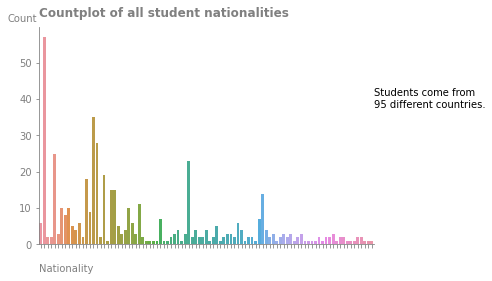

In [41]:
#https://seaborn.pydata.org/generated/seaborn.countplot.html
fig, ax = plt.subplots()
ax = sns.countplot(x = chinese_class_df['Nationality'])
format_plots(ax, "Countplot of all student nationalities", "Nationality", "Count")
ax.set(xticklabels=[])
fig.text(0.9, 0.6, "Students come from \n{} different countries.".format(len(chinese_class_df['Nationality'].unique())), ha='left')
ax;

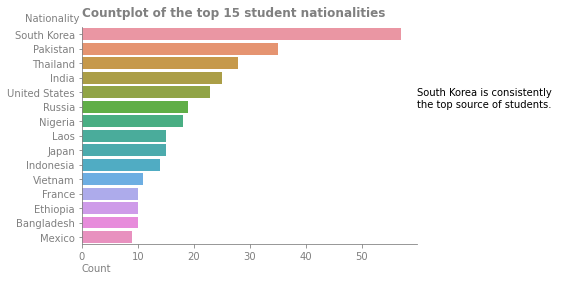

In [42]:
fig, ax = plt.subplots()
ax = sns.countplot(y="Nationality", data=chinese_class_df,
              order=chinese_class_df.Nationality.value_counts().iloc[:15].index)
format_plots(ax, "Countplot of the top 15 student nationalities", "Count", "Nationality")
fig.text(0.9, 0.6, "South Korea is consistently \nthe top source of students.", ha='left');

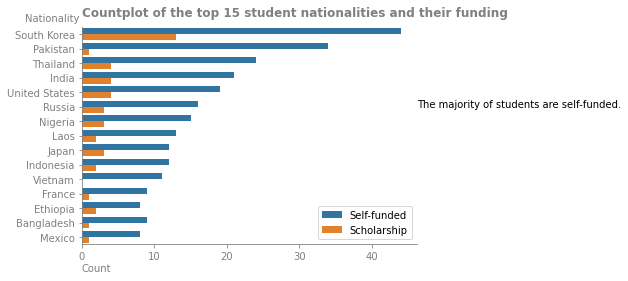

In [43]:
fig, ax = plt.subplots()
ax = sns.countplot(y="Nationality", hue="Scholarship", data=chinese_class_df,
              order=chinese_class_df.Nationality.value_counts().iloc[:15].index)
format_plots(ax, "Countplot of the top 15 student nationalities and their funding", "Count", "Nationality")
fig.text(0.9, 0.6, "The majority of students are self-funded.", ha='left')
plt.legend(['Self-funded', 'Scholarship']);

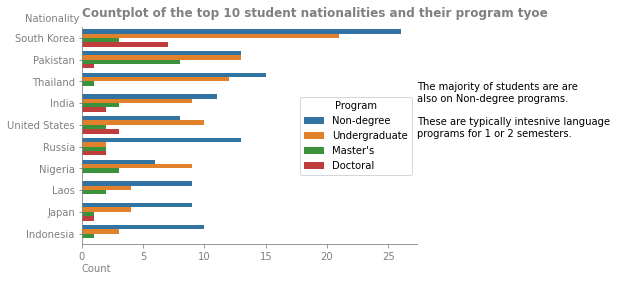

In [44]:
fig, ax = plt.subplots()
ax = sns.countplot(y="Nationality", hue="Program", data=chinese_class_df,
              order=chinese_class_df.Nationality.value_counts().iloc[:10].index)
format_plots(ax, "Countplot of the top 10 student nationalities and their program tyoe", "Count", "Nationality")
fig.text(0.9, 0.5, "The majority of students are are \nalso on Non-degree programs.\n\nThese are typically intesnive language \nprograms for 1 or 2 semesters.", ha='left');

### HSK test takers and results

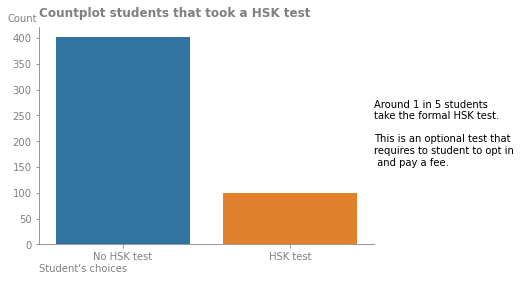

In [45]:
fig, ax = plt.subplots()
ax = sns.countplot(x = chinese_class_df['HSK test?'])
format_plots(ax, "Countplot students that took a HSK test", "Student's choices", "Count")
ax.set(xticklabels=['No HSK test', 'HSK test'])
fig.text(0.9, 0.4, "Around 1 in 5 students \ntake the formal HSK test. \n\nThis is an optional test that \nrequires to student to opt in\n and pay a fee.".format(len(chinese_class_df['Nationality'].unique())), ha='left')
ax;

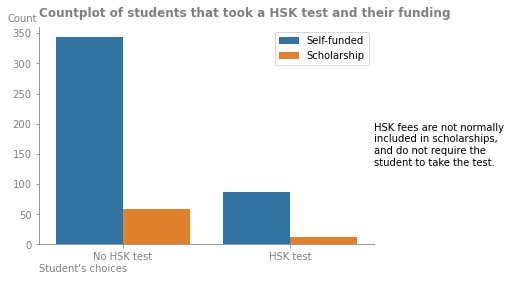

In [46]:
fig, ax = plt.subplots()
ax = sns.countplot(x = chinese_class_df['HSK test?'], hue = chinese_class_df['Scholarship'])
format_plots(ax, "Countplot of students that took a HSK test and their funding", "Student's choices", "Count")
ax.set(xticklabels=['No HSK test', 'HSK test'])
fig.text(0.9, 0.4, "HSK fees are not normally \nincluded in scholarships, \nand do not require the \nstudent to take the test.".format(len(chinese_class_df['Nationality'].unique())), ha='left')
plt.legend(['Self-funded', 'Scholarship']);
ax;

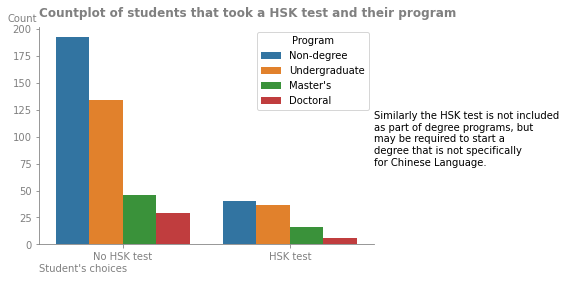

In [47]:
fig, ax = plt.subplots()
ax = sns.countplot(x = chinese_class_df['HSK test?'], hue = chinese_class_df['Program'])
format_plots(ax, "Countplot of students that took a HSK test and their program", "Student's choices", "Count")
ax.set(xticklabels=['No HSK test', 'HSK test'])
fig.text(0.9, 0.4, "Similarly the HSK test is not included \nas part of degree programs, but \nmay be required to start a \ndegree that is not specifically \nfor Chinese Language.".format(len(chinese_class_df['Nationality'].unique())), ha='left')
ax;

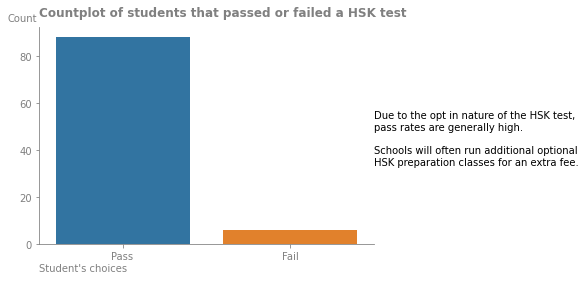

In [48]:
fig, ax = plt.subplots()
ax = sns.countplot(x = 'HSK Pass', data = chinese_class_df.loc[chinese_class_df['HSK test?'] == 1])
format_plots(ax, "Countplot of students that passed or failed a HSK test", "Student's choices", "Count")
ax.set(xticklabels=['Pass', 'Fail'])
fig.text(0.9, 0.4, "Due to the opt in nature of the HSK test, \npass rates are generally high. \n\nSchools will often run additional optional \nHSK preparation classes for an extra fee.".format(len(chinese_class_df['Nationality'].unique())), ha='left')
ax;

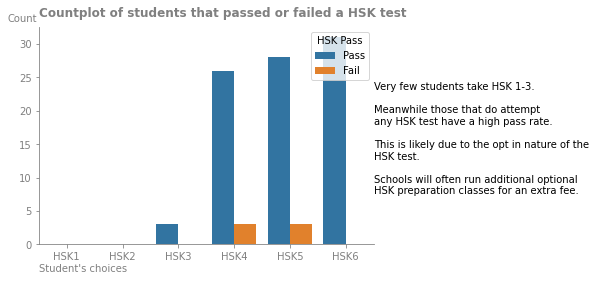

In [49]:
fig, ax = plt.subplots()
ax = sns.countplot(x = 'HSK Level', hue = 'HSK Pass', order = ['HSK1', 'HSK2', 'HSK3', 'HSK4', 'HSK5', 'HSK6'], data = chinese_class_df.loc[chinese_class_df['HSK test?'] == 1])
format_plots(ax, "Countplot of students that passed or failed a HSK test", "Student's choices", "Count")
#ax.set(xticklabels=['Pass', 'Fail'])
fig.text(0.9, 0.3, "Very few students take HSK 1-3.\n\nMeanwhile those that do attempt \nany HSK test have a high pass rate.\n\nThis is likely due to the opt in nature of the \nHSK test. \n\nSchools will often run additional optional \nHSK preparation classes for an extra fee.".format(len(chinese_class_df['Nationality'].unique())), ha='left')
ax;

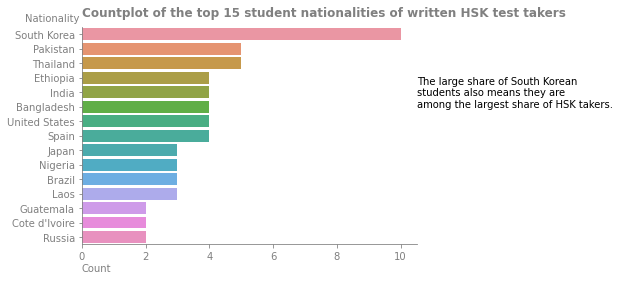

In [50]:
fig, ax = plt.subplots()
ax = sns.countplot(y="Nationality", data=chinese_class_df.loc[chinese_class_df['HSK test?'] == 1],
              order=chinese_class_df.loc[chinese_class_df['HSK test?'] == 1].Nationality.value_counts().iloc[:15].index)
format_plots(ax, "Countplot of the top 15 student nationalities of written HSK test takers", "Count", "Nationality")
fig.text(0.9, 0.6, "The large share of South Korean \nstudents also means they are \namong the largest share of HSK takers.", ha='left');

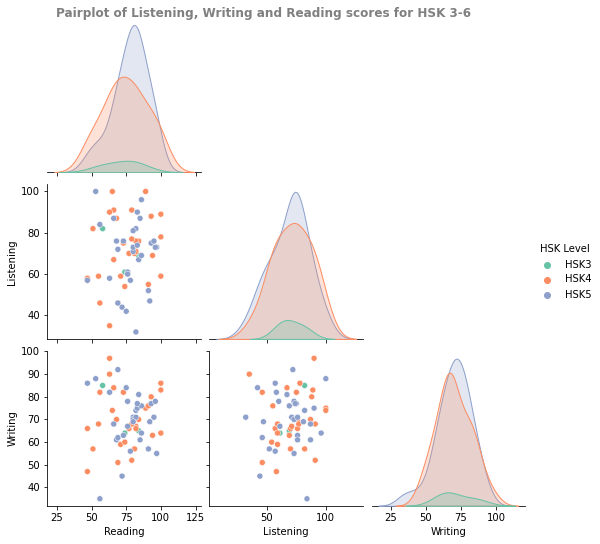

In [51]:
hsk_written_sections = chinese_class_df.loc[chinese_class_df['HSK Level'].isin(hsk_writing_sections),'HSK Level':'Writing'].sort_values('HSK Level')
ax = sns.pairplot(hsk_written_sections, dropna=True, hue = 'HSK Level', palette = 'Set2', corner=True)
ax.fig.suptitle("Pairplot of Listening, Writing and Reading scores for HSK 3-6", x=0.1, y = 1, fontsize = 12, ha='left', color = '#808080', fontweight = 'bold');

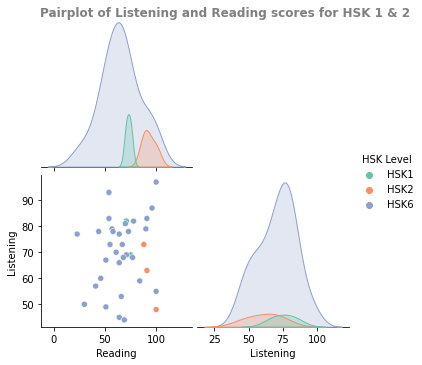

In [52]:
hsk_written_sections = chinese_class_df.loc[~chinese_class_df['HSK Level'].isin(hsk_writing_sections),'HSK Level':'Listening'].sort_values('HSK Level')
ax = sns.pairplot(hsk_written_sections, dropna=True, hue = 'HSK Level', palette = 'Set2', corner=True)
ax.fig.suptitle("Pairplot of Listening and Reading scores for HSK 1 & 2", x=0.1, y = 1, fontsize = 12, ha='left', color = '#808080', fontweight = 'bold');

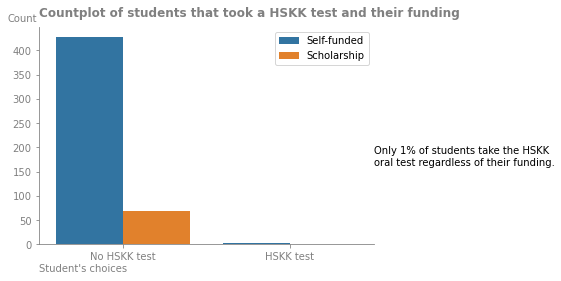

In [53]:
fig, ax = plt.subplots()
ax = sns.countplot(x = chinese_class_df['HSKK test?'], hue = chinese_class_df['Scholarship'])
format_plots(ax, "Countplot of students that took a HSKK test and their funding", "Student's choices", "Count")
ax.set(xticklabels=['No HSKK test', 'HSKK test'])
fig.text(0.9, 0.4, "Only 1% of students take the HSKK \noral test regardless of their funding.".format(len(chinese_class_df['Nationality'].unique())), ha='left')
plt.legend(['Self-funded', 'Scholarship']);
ax;

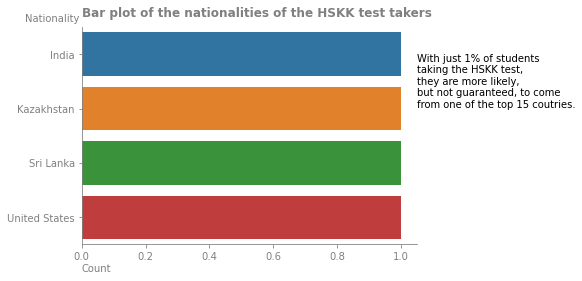

In [54]:
fig, ax = plt.subplots()
ax = sns.barplot(x = chinese_class_df.loc[chinese_class_df['HSKK test?'] == 1].groupby('Nationality').count().reset_index()['Scholarship'], y = chinese_class_df.loc[chinese_class_df['HSKK test?'] == 1].groupby('Nationality').count().reset_index()['Nationality'], orient="h")
format_plots(ax, "Bar plot of the nationalities of the HSKK test takers", "Count", "Nationality")
fig.text(0.9, 0.6, "With just 1% of students \ntaking the HSKK test, \nthey are more likely, \nbut not guaranteed, to come \nfrom one of the top 15 coutries.", ha='left')
ax;

## Next steps
* Write up a conclusion.
* Write README.

# Resources
<br>[1] Tian, L., Liu, N., C., 2019, Inward international students in China and their contributions to global common goods [online], avaialble from: https://www.researchcghe.org/perch/resources/publications/to-publish-wp46.pdf  [accessed 31 December 2020]</br>
<br>[2] Ministry of Education The People's Republic of China, 2019, Statistical report on international students in China for 2018 [online], available from: http://en.moe.gov.cn/documents/reports/201904/t20190418_378692.html  [accessed 31 December 2020]</br>
<br>[3] Study International, 2020, There are more African students than ever in China. Why are they still alienated?[online[, available from: https://www.studyinternational.com/news/african-students-china-alienated/  [accessed 31 December 2020]</br>
<br>[4] Numpy, 2020 [online], available from:  https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.choice.html#numpy.random.Generator.choice [accessed 31 December 2020]</br>
<br>[5] The World Bank, 2020, Data Bank [online], available from: https://data.worldbank.org/indicator/SP.POP.TOTL  [accessed 31 December 2020]</br>
<br>[6] Worldometer, How many Countries in Africa? [online], avaiable from: https://www.worldometers.info/geography/how-many-countries-in-africa/ [accessed 31 December 2020]</br>
<br>[7] China Admissions, 2020, Scholarships to Study in China for International Students
 [online], available from: https://www.china-admissions.com/blog/china-scholarship/ [accessed 31 December 2020]</br>
<br>[8] Chinese Scholarship Council, 2020, Chinese Government Scholarships [online], available from: https://www.chinesescholarshipcouncil.com/ [accessed 31 December 2020]</br>
<br>[9] Scholarship Fellow, 2020, [Pro Guide] Beijing Government Scholarship In 2020/21 [online], available from: https://scholarshipfellow.com/beijing-government-scholarships-bs-ms-phd-international-students/ [accessed 31 December 2020]</br>
<br>[10] CUCAS Fu Scholarship, 2020, Browse and Apply 2021 China Scholarships [online], available from: https://www.cucas.cn/china_scholarships/index/all_scholarship/Beijing/all_universities/all_degrees/all_languages/all_year/all_programs/0_0_1_0_0_0_0/page=1  [accessed 31 December 2020]</br>
<br>[11] Numpy, 2020 [online], available from: https://numpy.org/doc/stable/reference/random/generated/numpy.random.binomial.html [accessed 31 December 2020]</br>
<br>[12] HanBan, HSK [online], available from: http://english.hanban.org/node_8002.htm [accessed 31 December 2020] </br>
<br>[13] 遍地幸福的博客, 2013, _新HSK考生人数统计（2013年)_, 20 February [Sina Weibo], available from:  http://blog.sina.com.cn/s/blog_53e7c11d0101f02j.html [accessed 31 December 2020]</br>
<br>[14] The Pie News, 2020, HSK Mandarin learners’ exams to add new levels [online], available from: https://thepienews.com/news/hsk-exam-three-new-levels/#:~:text=According%20to%20the%20Hanban%2C%20between,HSK4%20being%20the%20most%20popular [accessed 31 December 2020]</br>
<br>[15] William & Mary, The HSK Speaking Test (HSKK) [online], available from: https://www.wm.edu/sites/confuciusinstitute/other-resources/tests/hskk/index.php [accessed 31 December 2020]</br>
<br>[16] ImproveMandarin, 2020, HSK vs HSKK: Which Chinese Test Is Right for You? (Full Comparison + Advice) [online], available from: https://improvemandarin.com/hsk-vs-hskk/ [accessed 31 December 2020]</br>
<br>[17] Taguchi, N., Li, S., 2017, Assessment of study abroad outcomes in Chinese as a second language: gains in cross-cultural adaptability, language contact and proficiency [online], available from: https://www.researchgate.net/publication/312107625_Assessment_of_study_abroad_outcomes_in_Chinese_as_a_second_language_gains_in_cross-cultural_adaptability_language_contact_and_proficiency [accessed 31 December 2020] </br>
<br>[18] Chinesetest.cn, 2013, 新HSK分数是怎样处理的[online], available from: http://www.chinesetest.cn/gonewcontent.do?id=8750514 [accessed 31 December 2020]</br>
<br>[19] China Education Centre, Study HSK [online], available from: https://www.chinaeducenter.com/en/exams.php [accessed 31 December 2020]</br>
<br>[20] Numpy, 2020 [online], available from: https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html [accessed 31 December 2020]</br>
<br>[21] ImproveMandarin, 2020, New HSK Test: Changes and Updates You’ve Got to Know about HSK 3.0 [online], available from: https://improvemandarin.com/new-hsk/ [accessed 31 December 2020]</br>
<br>[23] StackOverflow, 2015, Round columns in pandas dataframe [online], available from: https://stackoverflow.com/questions/31247763/round-columns-in-pandas-dataframe [accessed 31 December 2020]</br>
